In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
import pandas as pd

df = pd.read_csv('example_twitter_data_6k.csv', sep='\t', encoding='utf-8')


# Example data - remake

def set_sent_class(sent):
    limit = 0.00
    if sent > limit:
        return 1 #'Positive'
    elif sent < (limit*-1):
        return -1 #'Negative'
    else:
        return 0 # 'Neutral'

df = pd.read_csv('example_twitter_data_6k.csv', sep='\t', encoding='utf-8')
df = df[(df.sentiment != 0)].copy(deep=True).reset_index(drop=True)
df['h_l'] = df.hashtags.apply(lambda x: len(str(x).split()))
df['sent_class'] = df.sentiment.apply(set_sent_class)

print('Shape:', df.shape)
df.head(1)

Shape: (3800, 7)


,text,hashtags,retweet_count,favorite_count,sentiment,h_l,sent_class
0,vanguardsw rt chboursin ai achieve human like ...,human-like skills,7.0,0.0,0.22,2,1


linear model coeff (w): [0.04279391]
linear model intercept (b): 0.111
R-squared score (training): 0.021
R-squared score (test): 0.022


<IPython.core.display.Javascript object>


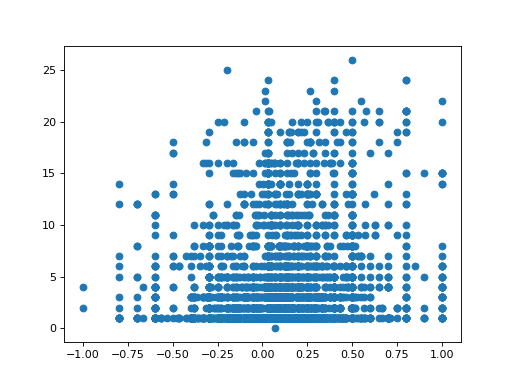

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Data
#df = pd.read_csv('https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv')
#X = df[['horsepower']]
#y = df['price']
X = df[['h_l']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Feature Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model:
LR = LinearRegression()
linreg = LR.fit(X_train_scaled, y_train)

# Predict:
#

# Tune:
#

# Dataset Description
print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test_scaled, y_test)))

plt.scatter(y, X)
plt.show()